In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Importing the Dataset

In [2]:
df=pd.read_csv("Automobile_insurance_fraud.csv")

In [3]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


There are 1000 rows and 40 columns in the dataset.
As the output variable is fraud_reported this is a classification problem.
All other columns except fraud_reproted are the independent variables.
In this dataset based on the given input variables we are supposed to determine wether the given claim is a fraud or not.



In [4]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

The above tells us the names of each columns.

In [5]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

The various data types of each columns.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

Tells us about the total count and the data types of each column.

In [7]:
df.shape

(1000, 40)

# Univariant, Bivariant, Multivariant Analysis

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

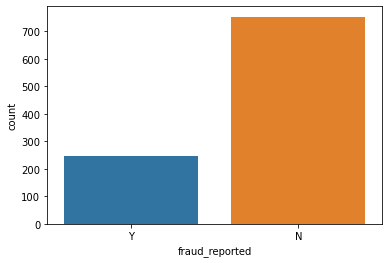

In [8]:
sns.countplot(df['fraud_reported'])

As we could see that there are 2 categories of data i.e Yes/No there is huge difference between 2 so will will perfrom upsampling and downsampling techiques.

<AxesSubplot:xlabel='policy_state', ylabel='count'>

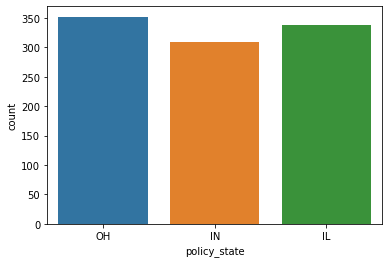

In [9]:
sns.countplot(df['policy_state'])

There are 3 different categories of policy state  i.e OH, IN, IL  OH being the higest in count. 

<AxesSubplot:xlabel='policy_csl', ylabel='count'>

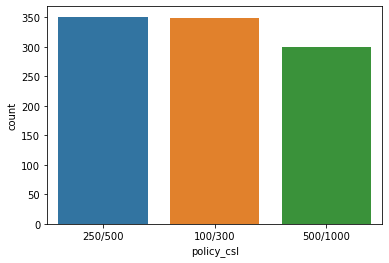

In [10]:
sns.countplot(df['policy_csl'])

There are 3 different policy_csl i.e 250/500, 100/300, 500/1000.

<AxesSubplot:xlabel='insured_relationship', ylabel='count'>

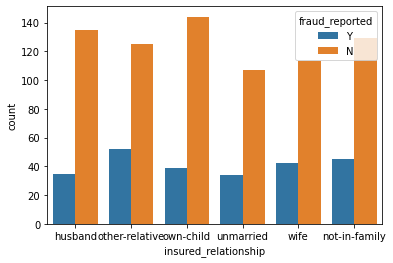

In [12]:
sns.countplot(x='insured_relationship',hue='fraud_reported',data=df)

From the above plot we can see that the one where the insured_relationship is of other relative has reported frauds.

<AxesSubplot:xlabel='incident_type', ylabel='count'>

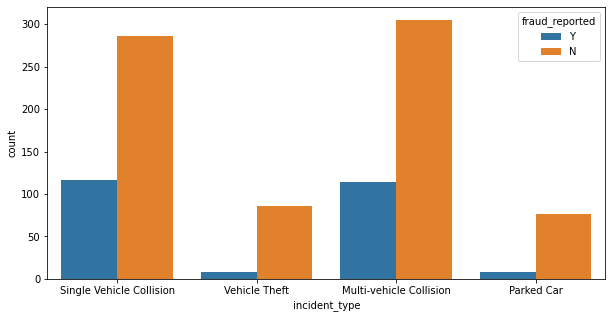

In [13]:
plt.figure(figsize=(10,5))
sns.countplot(x='incident_type',hue='fraud_reported',data=df)

one with the single vehicle and Multi vehcile collisions has reported maximum frauds.

<AxesSubplot:xlabel='witnesses', ylabel='count'>

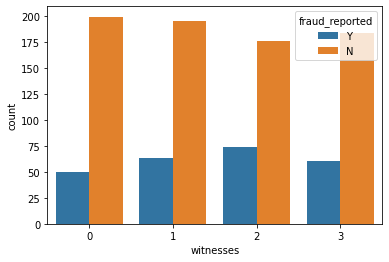

In [14]:
sns.countplot(x='witnesses',hue='fraud_reported',data=df)

One with the two witness has reported higest number of frauds.

<AxesSubplot:xlabel='collision_type', ylabel='count'>

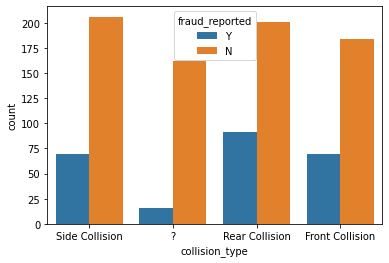

In [15]:
sns.countplot(x='collision_type',hue='fraud_reported',data=df)

One where the collision type is of rear collision has reported higest number of frauds.

<AxesSubplot:xlabel='policy_annual_premium', ylabel='Density'>

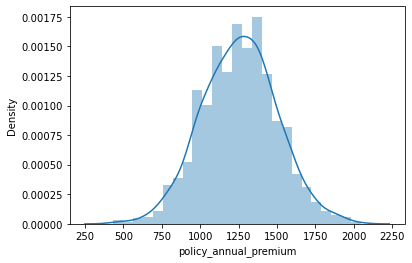

In [16]:
sns.distplot(df['policy_annual_premium'])

In the above plot the annual premimum is normally distributed.

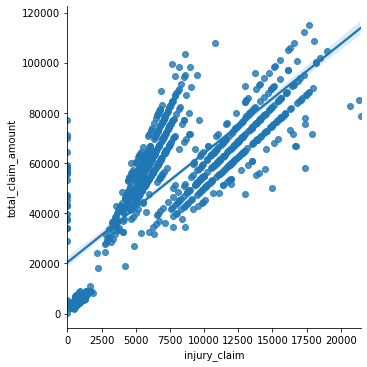

In [17]:
sns.lmplot(data=df, y='total_claim_amount', x='injury_claim')

With the increase in the total claim amount injury claim also increases.

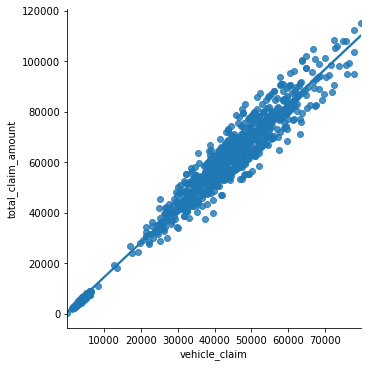

In [18]:
sns.lmplot(data=df, y='total_claim_amount', x='vehicle_claim')

With the increase in the total claim ammount, the vehicle claim also increases.

<AxesSubplot:xlabel='incident_severity', ylabel='count'>

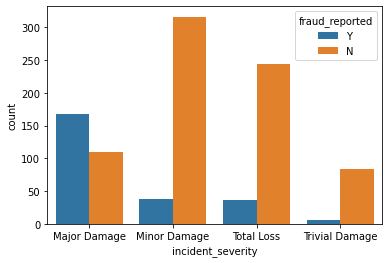

In [19]:
sns.countplot(x='incident_severity',hue='fraud_reported',data=df)

One where the incident_severity having major damage as reported the maximum number of frauds.

<AxesSubplot:xlabel='authorities_contacted', ylabel='count'>

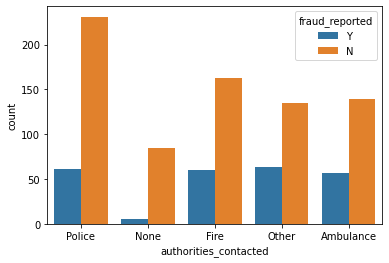

In [20]:
sns.countplot(x='authorities_contacted',hue='fraud_reported',data=df)

One where the none of the authorities were contacted has reported least number of records.

<AxesSubplot:>

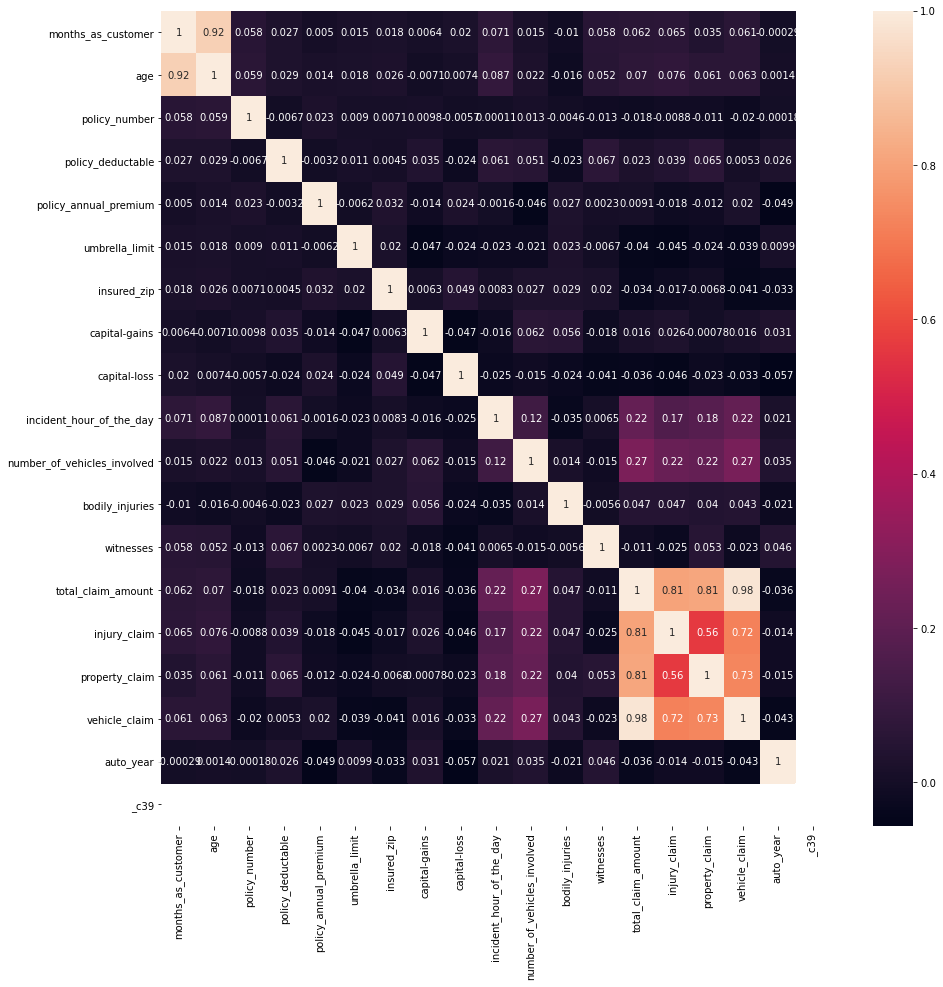

In [23]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)

In the above plot,
1. total_claim_ammount, injury_claim, property_claim, vehicle_claim are positivly related to each other.
2. months_as_customer and age of customers are psoitivly related to each other.


# Data Cleaning/Preprocessing

In [25]:
for i in df.columns:
    if df[i].dtypes== object:
        print(df[i].value_counts())
        print("----------")
    else:
        pass

01-01-2006    3
28-04-1992    3
05-08-1992    3
25-05-1990    2
11-11-1998    2
             ..
15-12-1996    1
25-02-2011    1
03-12-2005    1
09-10-1995    1
26-10-1996    1
Name: policy_bind_date, Length: 951, dtype: int64
----------
OH    352
IL    338
IN    310
Name: policy_state, dtype: int64
----------
250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64
----------
FEMALE    537
MALE      463
Name: insured_sex, dtype: int64
----------
JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64
----------
machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
priv-house-serv      71
other-service        71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name

Through the above code we will be ckecking out the value count of  columns having object data type. 

In [26]:
df['property_damage'].value_counts()

?      360
NO     338
YES    302
Name: property_damage, dtype: int64

As we could see that there are 3 types one is ? which will be replacing with the mode value.

In [27]:
df['police_report_available'].value_counts() #replcaing the missing values with the mode.

NO     343
?      343
YES    314
Name: police_report_available, dtype: int64

In [28]:
df['collision_type'].value_counts()  #replacing the missing values with the mode.

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64

In [29]:
df["collision_type"] = df["collision_type"].str.replace('?', 'Rear Collision')

In [30]:
df['collision_type'].value_counts()

Rear Collision     470
Side Collision     276
Front Collision    254
Name: collision_type, dtype: int64

In [31]:
df['police_report_available']=df['police_report_available'].str.replace('?','NO') # replcaing the missing values with the mode.

In [32]:
df['police_report_available'].value_counts()

NO     686
YES    314
Name: police_report_available, dtype: int64

In [33]:
df['property_damage']=df['property_damage'].str.replace('?','NO') #replacing the missing values with the mode.

In [34]:
df['property_damage'].value_counts()

NO     698
YES    302
Name: property_damage, dtype: int64

# Feature Engineering

In [35]:
df.drop('policy_number',axis=1,inplace=True)

In [36]:
df.drop('policy_bind_date',axis=1,inplace=True)

In [37]:
df.drop('insured_zip',axis=1,inplace=True)

In [38]:
df.drop('incident_location',axis=1,inplace=True)

In [39]:
df.drop('auto_year',axis=1,inplace=True)

In [40]:
df.drop('_c39',axis=1,inplace=True)

In [41]:
df.drop('incident_date',axis=1,inplace=True)

Droping the above columns as they are giving us the least informtaion and contributing negetivly in determing the fraud_reported.

In [42]:
df.shape

(1000, 33)

In [43]:
df

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported
0,328,48,OH,250/500,1000,1406.91,0,MALE,MD,craft-repair,...,1,2,YES,71610,6510,13020,52080,Saab,92x,Y
1,228,42,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,...,0,0,NO,5070,780,780,3510,Mercedes,E400,Y
2,134,29,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,...,2,3,NO,34650,7700,3850,23100,Dodge,RAM,N
3,256,41,IL,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,...,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,Y
4,228,44,IL,500/1000,1000,1583.91,6000000,MALE,Associate,sales,...,0,1,NO,6500,1300,650,4550,Accura,RSX,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,OH,500/1000,1000,1310.80,0,FEMALE,Masters,craft-repair,...,0,1,NO,87200,17440,8720,61040,Honda,Accord,N
996,285,41,IL,100/300,1000,1436.79,0,FEMALE,PhD,prof-specialty,...,2,3,NO,108480,18080,18080,72320,Volkswagen,Passat,N
997,130,34,OH,250/500,500,1383.49,3000000,FEMALE,Masters,armed-forces,...,2,3,YES,67500,7500,7500,52500,Suburu,Impreza,N
998,458,62,IL,500/1000,2000,1356.92,5000000,MALE,Associate,handlers-cleaners,...,0,1,YES,46980,5220,5220,36540,Audi,A5,N


# Label Encoding

In [44]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
name=['policy_state','policy_csl','insured_sex','insured_education_level','insured_occupation','insured_hobbies','insured_relationship','incident_type','collision_type','incident_severity','authorities_contacted','incident_state','incident_city','property_damage','police_report_available','auto_make','fraud_reported','auto_model']
for val in name:
    df[val]=le.fit_transform(df[val].astype(str))


In [45]:
df

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported
0,328,48,2,1,1000,1406.91,0,1,4,2,...,1,2,1,71610,6510,13020,52080,10,1,1
1,228,42,1,1,2000,1197.22,5000000,1,4,6,...,0,0,0,5070,780,780,3510,8,12,1
2,134,29,2,0,2000,1413.14,5000000,0,6,11,...,2,3,0,34650,7700,3850,23100,4,30,0
3,256,41,0,1,2000,1415.74,6000000,0,6,1,...,1,2,0,63400,6340,6340,50720,3,34,1
4,228,44,0,2,1000,1583.91,6000000,1,0,11,...,0,1,0,6500,1300,650,4550,0,31,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,2,2,1000,1310.80,0,0,5,2,...,0,1,0,87200,17440,8720,61040,6,6,0
996,285,41,0,0,1000,1436.79,0,0,6,9,...,2,3,0,108480,18080,18080,72320,13,28,0
997,130,34,2,1,500,1383.49,3000000,0,5,1,...,2,3,1,67500,7500,7500,52500,11,19,0
998,458,62,0,2,2000,1356.92,5000000,1,0,5,...,0,1,1,46980,5220,5220,36540,1,5,0


Converting the categorial data into the numeric data so as to perform the furthur actions.

months_as_customer                AxesSubplot(0.125,0.772143;0.0824468x0.107857)
age                            AxesSubplot(0.223936,0.772143;0.0824468x0.107857)
policy_state                   AxesSubplot(0.322872,0.772143;0.0824468x0.107857)
policy_csl                     AxesSubplot(0.421809,0.772143;0.0824468x0.107857)
policy_deductable              AxesSubplot(0.520745,0.772143;0.0824468x0.107857)
policy_annual_premium          AxesSubplot(0.619681,0.772143;0.0824468x0.107857)
umbrella_limit                 AxesSubplot(0.718617,0.772143;0.0824468x0.107857)
insured_sex                    AxesSubplot(0.817553,0.772143;0.0824468x0.107857)
insured_education_level           AxesSubplot(0.125,0.642714;0.0824468x0.107857)
insured_occupation             AxesSubplot(0.223936,0.642714;0.0824468x0.107857)
insured_hobbies                AxesSubplot(0.322872,0.642714;0.0824468x0.107857)
insured_relationship           AxesSubplot(0.421809,0.642714;0.0824468x0.107857)
capital-gains               

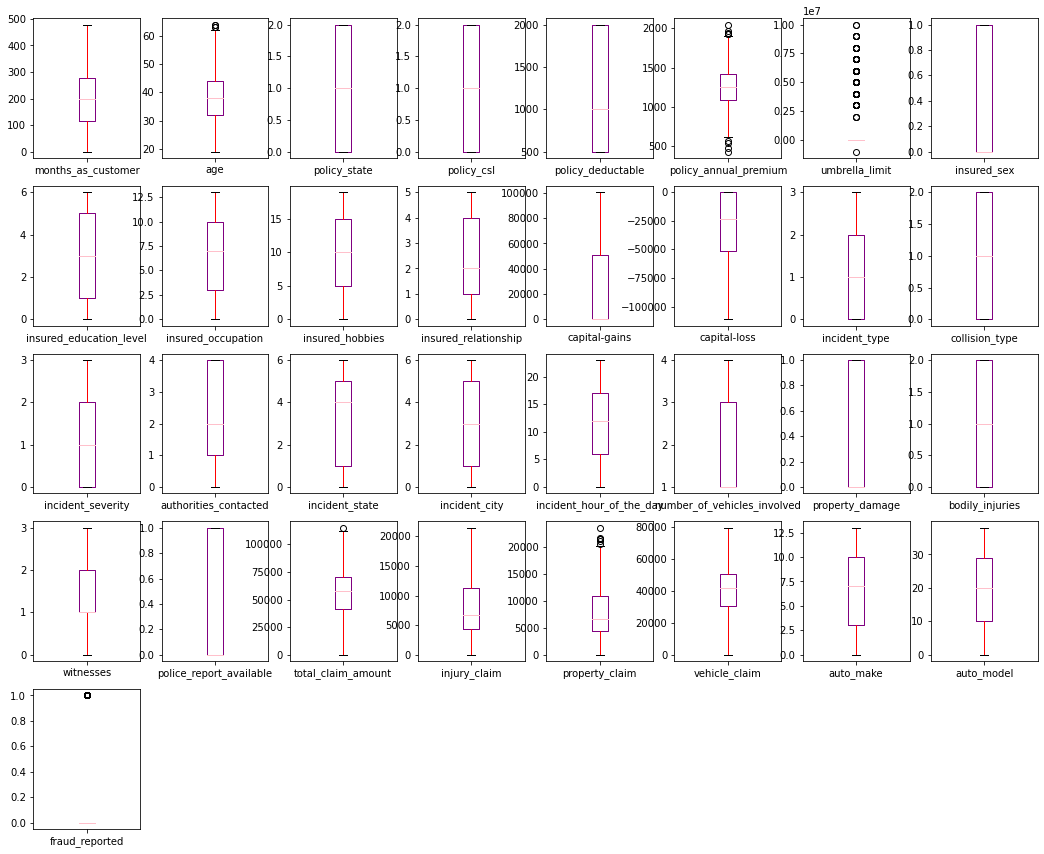

In [46]:
color=dict(boxes="Purple",whiskers="Red",medians="Pink",caps="Black")
df.plot(kind="box",subplots=True,layout=(6,8),figsize=(18,18),color=color)

In the above plot we can see that there is very slight presence of outliers in the columns.

In [47]:
df.describe()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,1.01400,0.951000,1136.000000,1256.406150,1.101000e+06,0.463000,2.966000,6.653000,...,0.992000,1.487000,0.314000,52761.94000,7433.420000,7399.570000,37928.950000,6.546000,19.318000,0.247000
std,115.113174,9.140287,0.83096,0.804516,611.864673,244.167395,2.297407e+06,0.498879,1.948497,4.019048,...,0.820127,1.111335,0.464349,26401.53319,4880.951853,4824.726179,18886.252893,4.034869,11.136107,0.431483
min,0.000000,19.000000,0.00000,0.000000,500.000000,433.330000,-1.000000e+06,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,0.000000,0.000000,0.000000
25%,115.750000,32.000000,0.00000,0.000000,500.000000,1089.607500,0.000000e+00,0.000000,1.000000,3.000000,...,0.000000,1.000000,0.000000,41812.50000,4295.000000,4445.000000,30292.500000,3.000000,10.000000,0.000000
50%,199.500000,38.000000,1.00000,1.000000,1000.000000,1257.200000,0.000000e+00,0.000000,3.000000,7.000000,...,1.000000,1.000000,0.000000,58055.00000,6775.000000,6750.000000,42100.000000,7.000000,20.000000,0.000000
75%,276.250000,44.000000,2.00000,2.000000,2000.000000,1415.695000,0.000000e+00,1.000000,5.000000,10.000000,...,2.000000,2.000000,1.000000,70592.50000,11305.000000,10885.000000,50822.500000,10.000000,29.000000,0.000000
max,479.000000,64.000000,2.00000,2.000000,2000.000000,2047.590000,1.000000e+07,1.000000,6.000000,13.000000,...,2.000000,3.000000,1.000000,114920.00000,21450.000000,23670.000000,79560.000000,13.000000,38.000000,1.000000


In the above plot,
1. Mean is more that 50% in some of the columns we can say that there is slight presnece of skewness.
2. In some of the columns like property claim has huge difference between 75% and max value which depicts the presence of outliers.

# Skewness and outliers

In [48]:
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_state                  -0.026177
policy_csl                     0.088928
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_hobbies               -0.061563
insured_relationship           0.077488
capital-gains                  0.478850
capital-loss                  -0.391472
incident_type                  0.101507
collision_type                -0.033682
incident_severity              0.279016
authorities_contacted         -0.121744
incident_state                -0.148865
incident_city                  0.049531
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
property_damage                0.863806
bodily_injuries                0.014777
witnesses                      0.019636


The data is slightly skewed for which we will be performing the yeo-Johnnson method.

# Dividing the Dataset into Independent(X) and Depedent(Y) variable

In [49]:
x=df.iloc[:,:-1]  #Independent varaible.
x

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model
0,328,48,2,1,1000,1406.91,0,1,4,2,...,1,1,2,1,71610,6510,13020,52080,10,1
1,228,42,1,1,2000,1197.22,5000000,1,4,6,...,0,0,0,0,5070,780,780,3510,8,12
2,134,29,2,0,2000,1413.14,5000000,0,6,11,...,0,2,3,0,34650,7700,3850,23100,4,30
3,256,41,0,1,2000,1415.74,6000000,0,6,1,...,0,1,2,0,63400,6340,6340,50720,3,34
4,228,44,0,2,1000,1583.91,6000000,1,0,11,...,0,0,1,0,6500,1300,650,4550,0,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,2,2,1000,1310.80,0,0,5,2,...,1,0,1,0,87200,17440,8720,61040,6,6
996,285,41,0,0,1000,1436.79,0,0,6,9,...,1,2,3,0,108480,18080,18080,72320,13,28
997,130,34,2,1,500,1383.49,3000000,0,5,1,...,0,2,3,1,67500,7500,7500,52500,11,19
998,458,62,0,2,2000,1356.92,5000000,1,0,5,...,0,0,1,1,46980,5220,5220,36540,1,5


In [50]:
y=df.iloc[:,-1]  #Dependent Vraibale.
y

0      1
1      1
2      0
3      1
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: fraud_reported, Length: 1000, dtype: int32

# Variance Inflation Factor

In [51]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
def cal_vif(x):
    vif=pd.DataFrame()
    vif["variables"]=x.columns
    vif["VIF FACTOR"]=[variance_inflation_factor(x.values,i) for i in range (x.shape[1])]
    return(vif)

In [52]:
cal_vif(x)

,variables,VIF FACTOR
0,months_as_customer,22.911592
1,age,95.166964
2,policy_state,2.527769
3,policy_csl,2.448540
4,policy_deductable,4.522157
5,policy_annual_premium,24.552434
6,umbrella_limit,1.265231
7,insured_sex,1.904546
8,insured_education_level,3.405166
9,insured_occupation,3.735437


We will be performing the VIF Factor to check the multicollinearities and will be droping the columns with the higest Vif Factor as in this case we can see that the vif factor is almost in range so will not be droping any column.

# Performing Power Trnasformation and Standard Scaling

In [53]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')  #to remove skewness
x

array([[ 1.05127872,  1.00873272,  1.14604754, ...,  0.75369677,
         0.85911096, -1.80834465],
       [ 0.30453584,  0.43143333,  0.0718058 , ..., -1.7866293 ,
         0.41861586, -0.58622515],
       [-0.51122603, -1.13951302,  1.14604754, ..., -0.82088123,
        -0.55514878,  0.94490524],
       ...,
       [-0.54970642, -0.47044379,  1.14604754, ...,  0.77723183,
         1.07113608,  0.04546316],
       [ 1.9126537 ,  2.13055434, -1.25937435, ..., -0.10425834,
        -1.44076333, -1.30534129],
       [ 1.90009963,  1.98572613,  1.14604754, ..., -1.77908726,
         0.41861586, -0.58622515]])

In [54]:
from sklearn.preprocessing import StandardScaler
mn=StandardScaler()  #bringing all the columns on same scale.
x=mn.fit_transform(x)
x

array([[ 1.05127872,  1.00873272,  1.14604754, ...,  0.75369677,
         0.85911096, -1.80834465],
       [ 0.30453584,  0.43143333,  0.0718058 , ..., -1.7866293 ,
         0.41861586, -0.58622515],
       [-0.51122603, -1.13951302,  1.14604754, ..., -0.82088123,
        -0.55514878,  0.94490524],
       ...,
       [-0.54970642, -0.47044379,  1.14604754, ...,  0.77723183,
         1.07113608,  0.04546316],
       [ 1.9126537 ,  2.13055434, -1.25937435, ..., -0.10425834,
        -1.44076333, -1.30534129],
       [ 1.90009963,  1.98572613,  1.14604754, ..., -1.77908726,
         0.41861586, -0.58622515]])

# SMOTEENN

In [55]:
from imblearn.combine import SMOTEENN
smt=SMOTEENN()      #SMOTE to balance the target variable.
x_res,y_res=smt.fit_resample(x,y)

We will be performing the combine technique called SMOTEENN i.e upsampling and downsampling to bring the counts on same.

In [74]:
y_res.value_counts()

1    675
0    193
Name: fraud_reported, dtype: int64

# Performing the Algorithms

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve,roc_auc_score
from scipy.stats import zscore
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier

In [57]:
maxacc=0  #finding the best random state
maxrs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x_res,y_res,test_size=.30,random_state=i)
    lm=LogisticRegression()
    lm.fit(x_train,y_train)
    pred=lm.predict(x_test)
    accu=accuracy_score(y_test,pred)
    if accu>maxacc:
        maxacc=accu
        maxrs=i
print("best accuracy is",round(maxacc,2),"at random state",maxrs)

best accuracy is 0.92 at random state 19


In [58]:
x_train1,x_test1,y_train1,y_test1=train_test_split(x_res,y_res,test_size=.30,random_state=19)

# Logistic Regression

In [59]:
lm=LogisticRegression()
lm.fit(x_train1,y_train1)
pred=lm.predict(x_test1)
az=accuracy_score(y_test1,pred)
print("accuracy score",az)
cl=classification_report(y_test1,pred)
print(cl)

accuracy score 0.9157088122605364
              precision    recall  f1-score   support

           0       0.90      0.60      0.72        47
           1       0.92      0.99      0.95       214

    accuracy                           0.92       261
   macro avg       0.91      0.79      0.83       261
weighted avg       0.91      0.92      0.91       261



# Decisison Tree Classifier

In [60]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train1,y_train1)
pred=dtc.predict(x_test1)
az=accuracy_score(y_test1,pred)
print("accuracy score",az)
cl=classification_report(y_test1,pred)
print(cl)

accuracy score 0.9425287356321839
              precision    recall  f1-score   support

           0       0.88      0.79      0.83        47
           1       0.95      0.98      0.97       214

    accuracy                           0.94       261
   macro avg       0.92      0.88      0.90       261
weighted avg       0.94      0.94      0.94       261



# Random Forest Classifier

In [61]:
rf=RandomForestClassifier()
rf.fit(x_train1,y_train1)
pred=rf.predict(x_test1)
ap=accuracy_score(y_test1,pred)
ap=ap*100
print("Accuracy Score",round(ap,2))
print(classification_report(y_test1,pred))

Accuracy Score 95.4
              precision    recall  f1-score   support

           0       0.93      0.81      0.86        47
           1       0.96      0.99      0.97       214

    accuracy                           0.95       261
   macro avg       0.94      0.90      0.92       261
weighted avg       0.95      0.95      0.95       261



# Ada Boost Classifier

In [62]:
ad=AdaBoostClassifier()
ad.fit(x_train1,y_train1)
pred=ad.predict(x_test1)
ap=accuracy_score(y_test1,pred)
ap=ap*100
print("Accuracy Score",round(ap,2))
print(classification_report(y_test1,pred))


Accuracy Score 94.64
              precision    recall  f1-score   support

           0       0.88      0.81      0.84        47
           1       0.96      0.98      0.97       214

    accuracy                           0.95       261
   macro avg       0.92      0.89      0.91       261
weighted avg       0.95      0.95      0.95       261



# Suport Vector Classifier

In [63]:
svc=SVC(kernel='rbf')
svc.fit(x_train1,y_train1)
pred=svc.predict(x_test1)
ap=accuracy_score(y_test1,pred)
ap=ap*100
print("Accuracy Score",round(ap,2))
print(classification_report(y_test1,pred))



Accuracy Score 94.64
              precision    recall  f1-score   support

           0       0.97      0.72      0.83        47
           1       0.94      1.00      0.97       214

    accuracy                           0.95       261
   macro avg       0.96      0.86      0.90       261
weighted avg       0.95      0.95      0.94       261



# Cross Validation Score

In [64]:
print(cross_val_score(lm,x,y,cv=5).mean())  #logistic regression

0.78


In [65]:
print(cross_val_score(dtc,x,y,cv=5).mean())   #decision tree classifier

0.7680000000000001


In [66]:
print(cross_val_score(rf,x,y,cv=5).mean())    #random forest classifier

0.7660000000000001


In [67]:
print(cross_val_score(ad,x,y,cv=5).mean())   #ada boost classifier

0.8010000000000002


In [68]:
print(cross_val_score(svc,x,y,cv=5).mean())   #support vector classifier

0.7489999999999999


From above,         Accuracy             Cross_val_score
1. logistic           92                     78
2. decision tree      94                     76
3. random forest      95                     76
4. ada boost          95                     80
5. svc                95                     74

Ada Boost Classifier is giving us the best performance.

# ROC_AUC SCORE

In [69]:
y_pred_prob=ad.predict_proba(x_test1)[:,1]

#y_pred_prob

In [70]:
fpr,tpr,thresholds=roc_curve(y_test1,y_pred_prob)

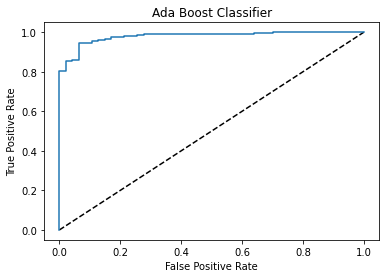

In [71]:
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="Ada BoostClassifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Ada Boost Classifier")
plt.show()

In [72]:
auc_score=roc_auc_score(y_test1,ad.predict(x_test1))
auc_score

0.892573076158282

The roc_auc score is almost equal to the accuracy score.

# Hyper Parameter Tunning using Grid Search CV

In [61]:
parameter={"algorithm":['SAMME','SAMME.R'],
           "n_estimators":np.arange(2,200),
          "random_state":np.arange(2,20),
          "learning_rate":np.arange(1,10)}

In [62]:
gcv=GridSearchCV(AdaBoostClassifier(),parameter,cv=5)

In [63]:
gcv.fit(x_train1,y_train1)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'n_estimators': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                         'random_state': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])})

In [64]:
gcv.best_params_ 

{'algorithm': 'SAMME.R',
 'learning_rate': 1,
 'n_estimators': 16,
 'random_state': 2}

# Final Model

In [66]:
ad=AdaBoostClassifier(algorithm='SAMME.R',learning_rate=1,n_estimators=100,random_state=2)
ad.fit(x_train1,y_train1)
pred=ad.predict(x_test1)
ap=accuracy_score(y_test1,pred)
ap=ap*100
print("Accuracy Score",round(ap,2))
print(classification_report(y_test1,pred))


Accuracy Score 95.8
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        35
           1       0.98      0.97      0.98       227

    accuracy                           0.96       262
   macro avg       0.91      0.92      0.91       262
weighted avg       0.96      0.96      0.96       262



# Saving the Model

In [73]:
import joblib
joblib.dump(ad,"insurance.pkl")

['insurance.pkl']